<a href="https://colab.research.google.com/github/OlekSmial/SPACE_TITANIC/blob/main/ALEKSANDER_%C5%9AMIA%C5%81OWSKI_76610_PRACA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('space_titanic_test.csv')
dg = pd.read_csv('space_titanic_train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
dg.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [6]:
dg.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


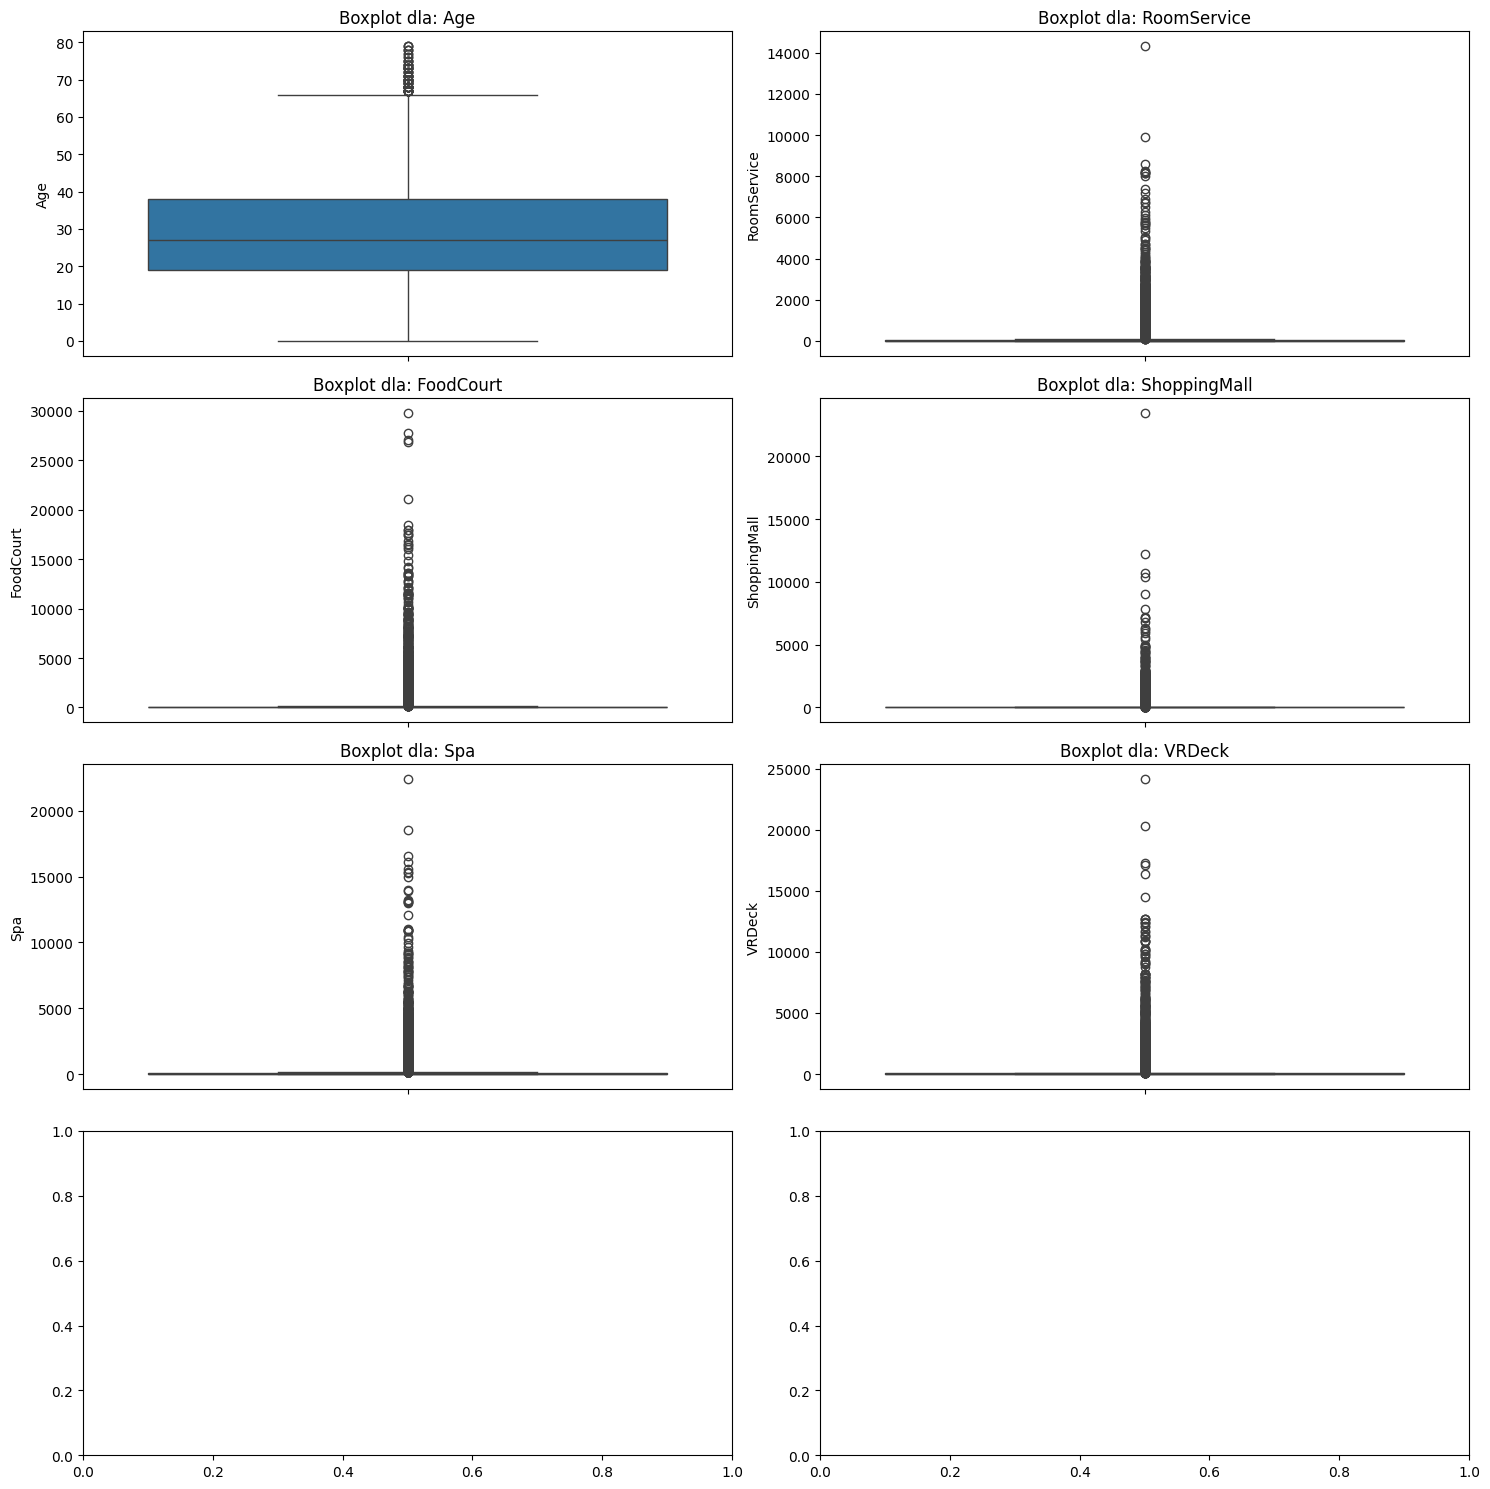

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(dg.select_dtypes(include=['float64', "int64"]).columns):
  sns.boxplot(data=dg[col], ax=axes[i])
  axes[i].set_title(f"Boxplot dla: {col}")


plt.tight_layout()
plt.show()

In [9]:
numeric_dg = df.select_dtypes(include = np.number)
correlation_matrix = numeric_dg.corr()
print(correlation_matrix)

                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.064097   0.111073      0.039249  0.108344   
RoomService   0.064097     1.000000  -0.030233      0.064501  0.006342   
FoodCourt     0.111073    -0.030233   1.000000      0.027809  0.244851   
ShoppingMall  0.039249     0.064501   0.027809      1.000000  0.003094   
Spa           0.108344     0.006342   0.244851      0.003094  1.000000   
VRDeck        0.102743    -0.032827   0.278152      0.029857  0.143291   

                VRDeck  
Age           0.102743  
RoomService  -0.032827  
FoodCourt     0.278152  
ShoppingMall  0.029857  
Spa           0.143291  
VRDeck        1.000000  


In [10]:
print(df['Cabin'].describe())

count        4177
unique       3265
top       G/160/P
freq            8
Name: Cabin, dtype: object


In [11]:

# skalowanie tylko wartosci numerycznych

numeric_columns = dg.select_dtypes(include=['float64', 'int64']).columns
dg_scaled = StandardScaler().fit_transform(dg[numeric_columns])
dg[numeric_columns] = dg_scaled

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled = StandardScaler().fit_transform(df[numeric_columns])
df[numeric_columns] = df_scaled

In [14]:
# future enginering
# z true/false na 0 1

#                         GET DUMMIES POMOGL CHAT
# Check if columns exist before applying get_dummies
original_columns = df.columns  # Store original columns for comparison

#Apply get_dummies only if the columns are present in the dataframe
columns_to_encode = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
columns_present = [col for col in columns_to_encode if col in original_columns]

if columns_present:
    df = pd.get_dummies(df, columns=columns_present, drop_first=True)
    dg = pd.get_dummies(dg, columns=columns_present, drop_first=True)
else:
    print("Warning: One or more specified columns not found in the DataFrame.")

# nan w wieku na średni wiek
dg['Age'] = dg['Age'].fillna(dg['Age'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())

# mysle że można cos zrobić z kabinami
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
# to jesr ważne trzeba podzielić te kabiny
le = LabelEncoder()
dg[['deck', 'num', 'side']] = dg['Cabin'].str.split('/', expand = True)
# teraz zmienimy deck i side na cyfry
dg['deck'] = dg['deck'].fillna('Unknown')  # WYPELNIENIE BRAKUJACYCH WARTOSCI BO POTEM BEDZIE WARIOWAĆ
dg['side'] = dg['side'].fillna('Unknown')
dg['deck'] = le.fit_transform(dg['deck'])
dg['side'] = le.fit_transform(dg['side'])

# teraz dla df
df[['deck',  'num', 'side']] = df['Cabin'].str.split('/', expand = True)
df['deck'] = df['deck'].fillna('Unknown') # WYPELNIENIE BRAKUJACYCH WARTOSCI BO POTEM BEDZIE WARIOWAC
df['side'] = df['side'].fillna('Unknown')
df['deck'] = le.fit_transform(df['deck'])
df['side'] = le.fit_transform(df['side'])

dg['num'] = dg['num'].fillna(0).astype(int)
df['num'] = df['num'].fillna(0).astype(int)

# można jeszcze polączyc łączne koszty
df['TotalSpending'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
dg['TotalSpending'] = dg['RoomService'] + dg['FoodCourt'] + dg['ShoppingMall'] + dg['Spa'] + dg['VRDeck']

# usuwam kabine po zmienieniu j3j  i imie
df.drop(['Cabin', 'Name'], axis=1, inplace=True)
dg.drop(['Cabin', 'Name'], axis=1, inplace=True)

KeyError: 'Cabin'

In [13]:
# TESTUJEMY
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [15]:
# Przygotowanie danych treningowych
X_train = dg.drop('Transported', axis=1)
y_train = dg['Transported']

# Przygotowanie danych testowych
X_test = df

In [16]:
# Inicjalizacja modelu
rf_model = RandomForestRegressor()

# HIPERPARAMETRY !!!!!
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2')
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

In [ ]:
# R2
r2 = r2_score(y_train, best_model.predict(X_train)) # Calculate R^2 on training data
print(f"R^2 score: {r2}")


R^2 score: 0.6545387759811494


In [ ]:
# Uzyskanie najlepszego modelu
best_model = random_search.best_estimator_

# PREDYKCJE I PLIK DO NICH
y_pred = best_model.predict(X_test)
df_test = pd.DataFrame({'PassengerId': df['PassengerId'], 'Transported': y_pred > 0.5})
df_test.to_csv('submission.csv', index=False)

In [ ]:
dg.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_True,VIP_True,deck,num,side,TotalSpending
0,0001_01,0.702095,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,False,True,False,False,True,False,False,1,0,0,-1.448450
1,0002_01,-0.333233,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,True,False,False,False,True,False,False,5,0,1,-0.716612
2,0003_01,2.013510,-0.272527,1.934922,-0.287317,5.634034,-0.223327,False,True,False,False,True,False,True,0,0,1,6.785785
3,0003_02,0.287964,-0.337025,0.511931,0.326250,2.655075,-0.097634,False,True,False,False,True,False,False,0,0,1,3.058597
4,0004_01,-0.885407,0.117466,-0.240833,-0.037590,0.223344,-0.264352,True,False,False,False,True,False,False,5,1,1,-0.201965
